In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("C:\\UMAR DATA\\Data Sciences\\machine learning\\Projects\\predictive maintenance\\ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df=df.drop(['UDI','Product ID'],axis='columns')

# Basic Understanding of Data

In [4]:
df.shape

(10000, 12)

In [5]:
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [8]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


# Exploratory Data Analysis

In [9]:
# For binary classification
df=df.drop(['TWF','HDF','PWF','OSF','RNF'],axis='columns')
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15096\2029933599.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x='Machine failure',palette='Set2')


Text(0.5, 1.0, 'Distribution of Feature Type')

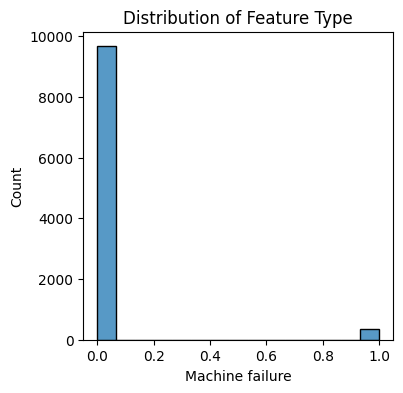

In [10]:
plt.figure(figsize=(4,4))
sns.histplot(data=df,x='Machine failure',palette='Set2')
plt.title('Distribution of Feature Type')

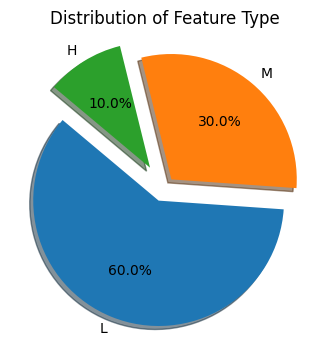

In [11]:
count=df['Type'].value_counts()
index=np.argmin(count)
explode=[0.2 if i==index else 0.1 for i in range(len(count))]
plt.figure(figsize=(4,4))
plt.pie(count,labels=count.index,autopct='%1.1f%%',startangle=140,shadow=True,explode=explode)
plt.title('Distribution of Feature Type')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Comparison between rpm and Nm')

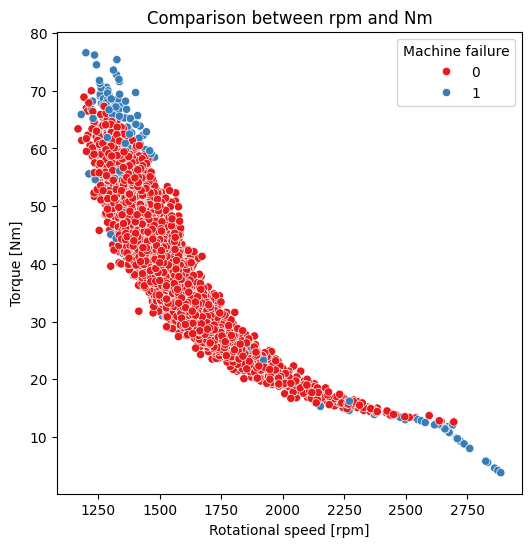

In [12]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='Rotational speed [rpm]',y='Torque [Nm]',hue='Machine failure',palette='Set1')
plt.title('Comparison between rpm and Nm')

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15096\2427696131.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set2',ax=ax,kde=True)
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15096\2427696131.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set2',ax=ax,kde=True)
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15096\2427696131.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set2',ax=ax,kde=True)
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15096\2427696131.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x=col,palette='Set2',ax=ax,kde=True)
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_15096\2427696131.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns

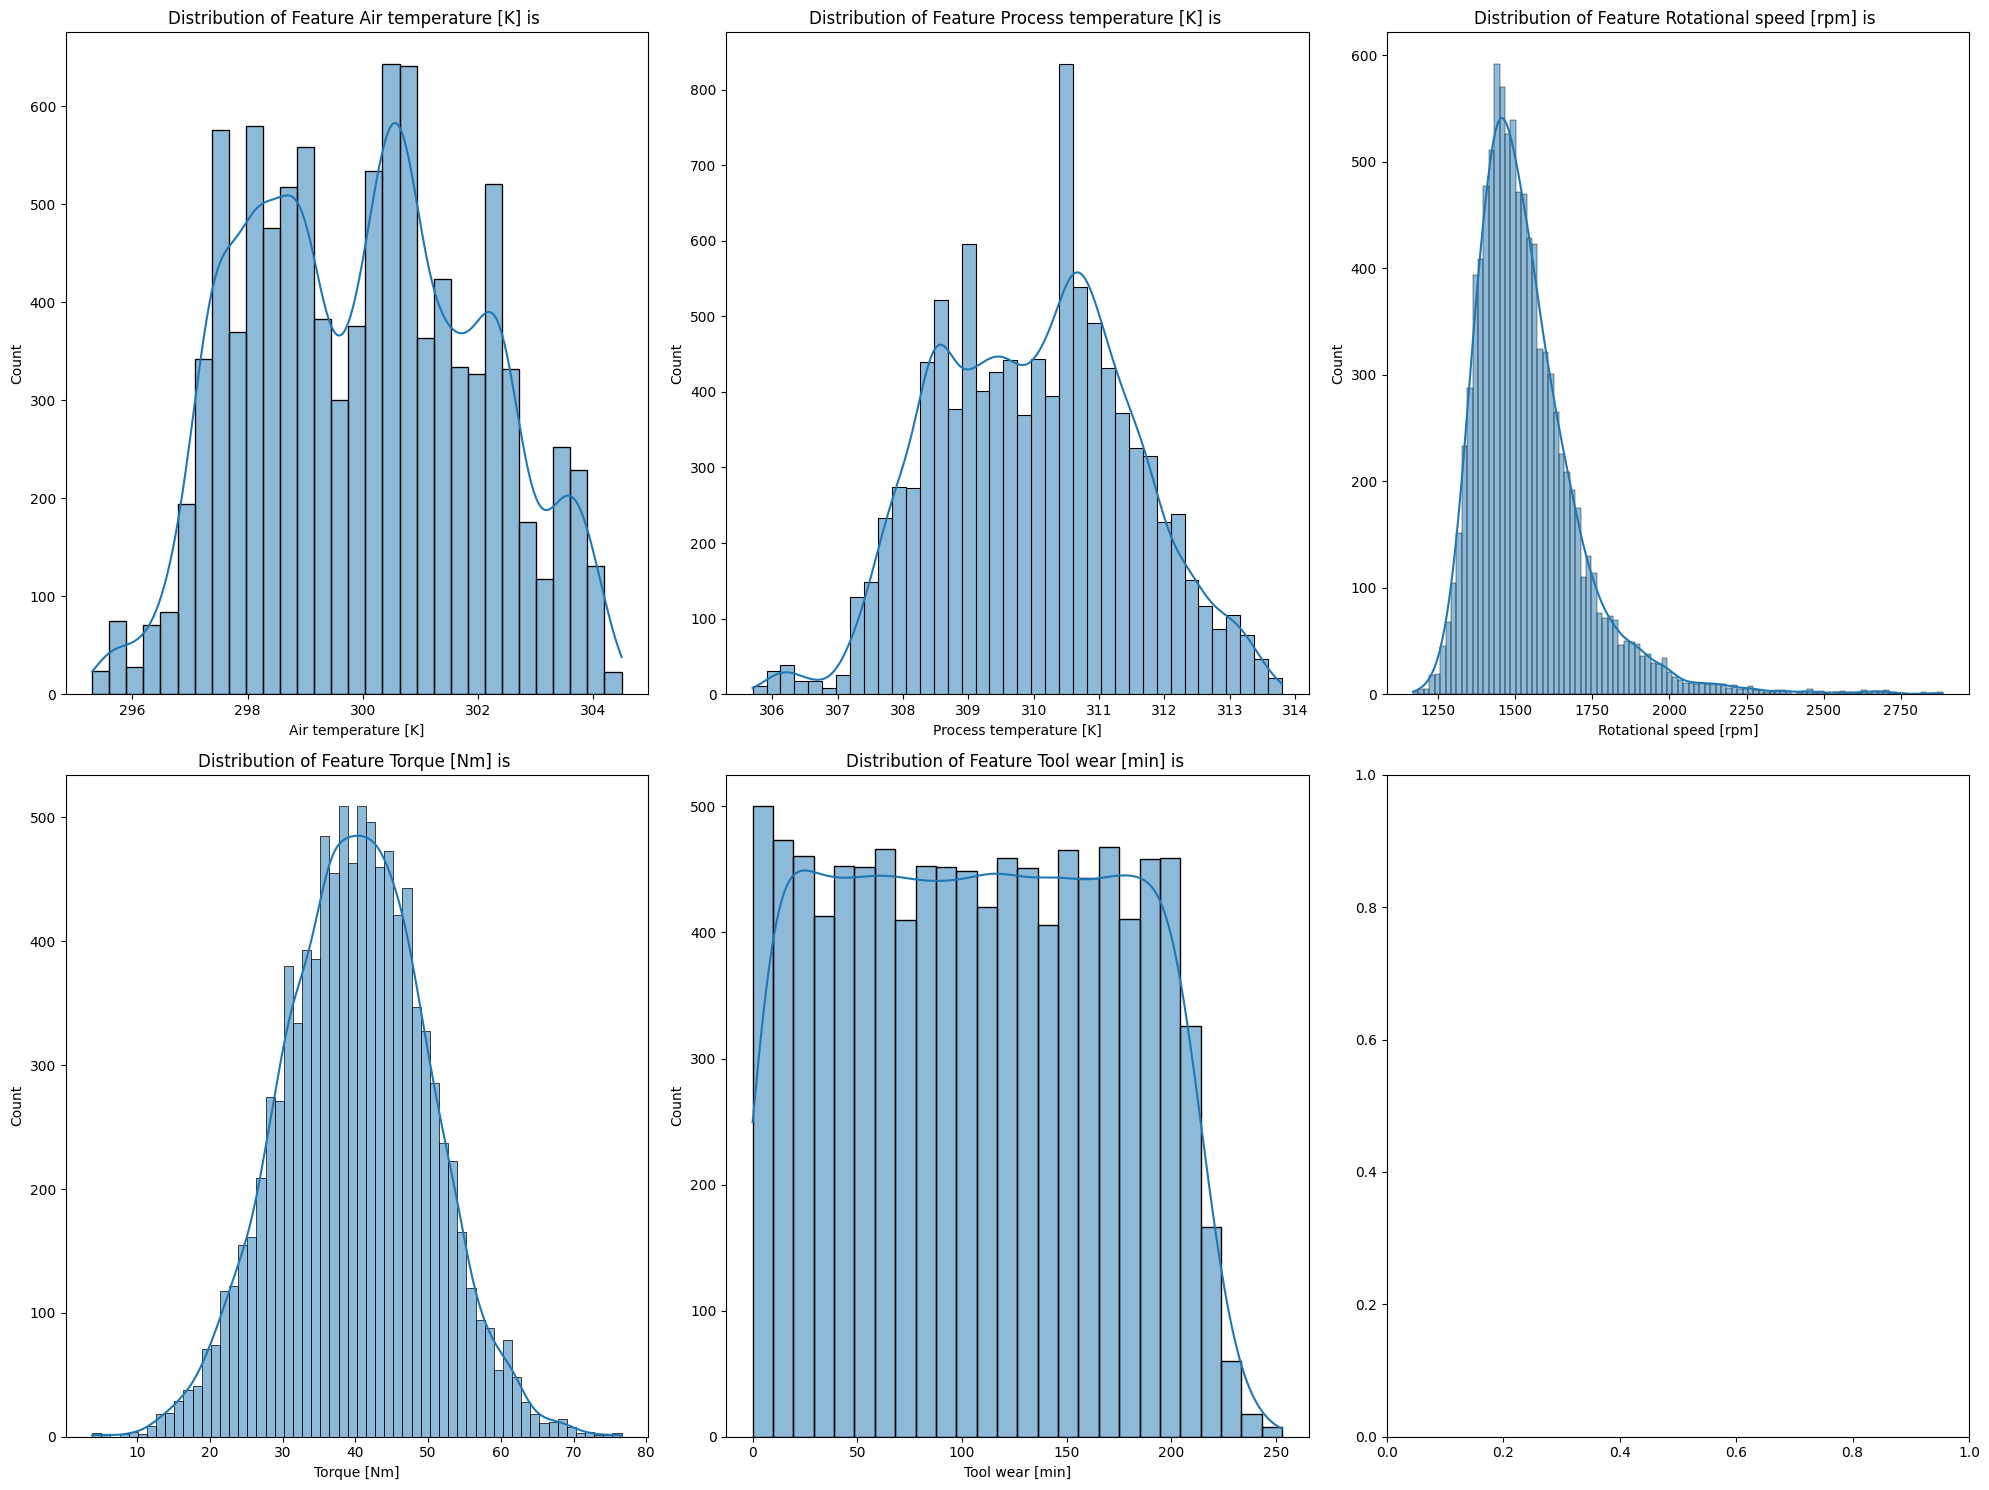

In [13]:
fig,axis=plt.subplots(2,3,figsize=(20,15))
axis=axis.flatten()
data=df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
for i,col in enumerate(data):
    ax=axis[i]
    sns.histplot(data=df,x=col,palette='Set2',ax=ax,kde=True)
    ax.set_title(f'Distribution of Feature {col} is ')
plt.tight_layout()

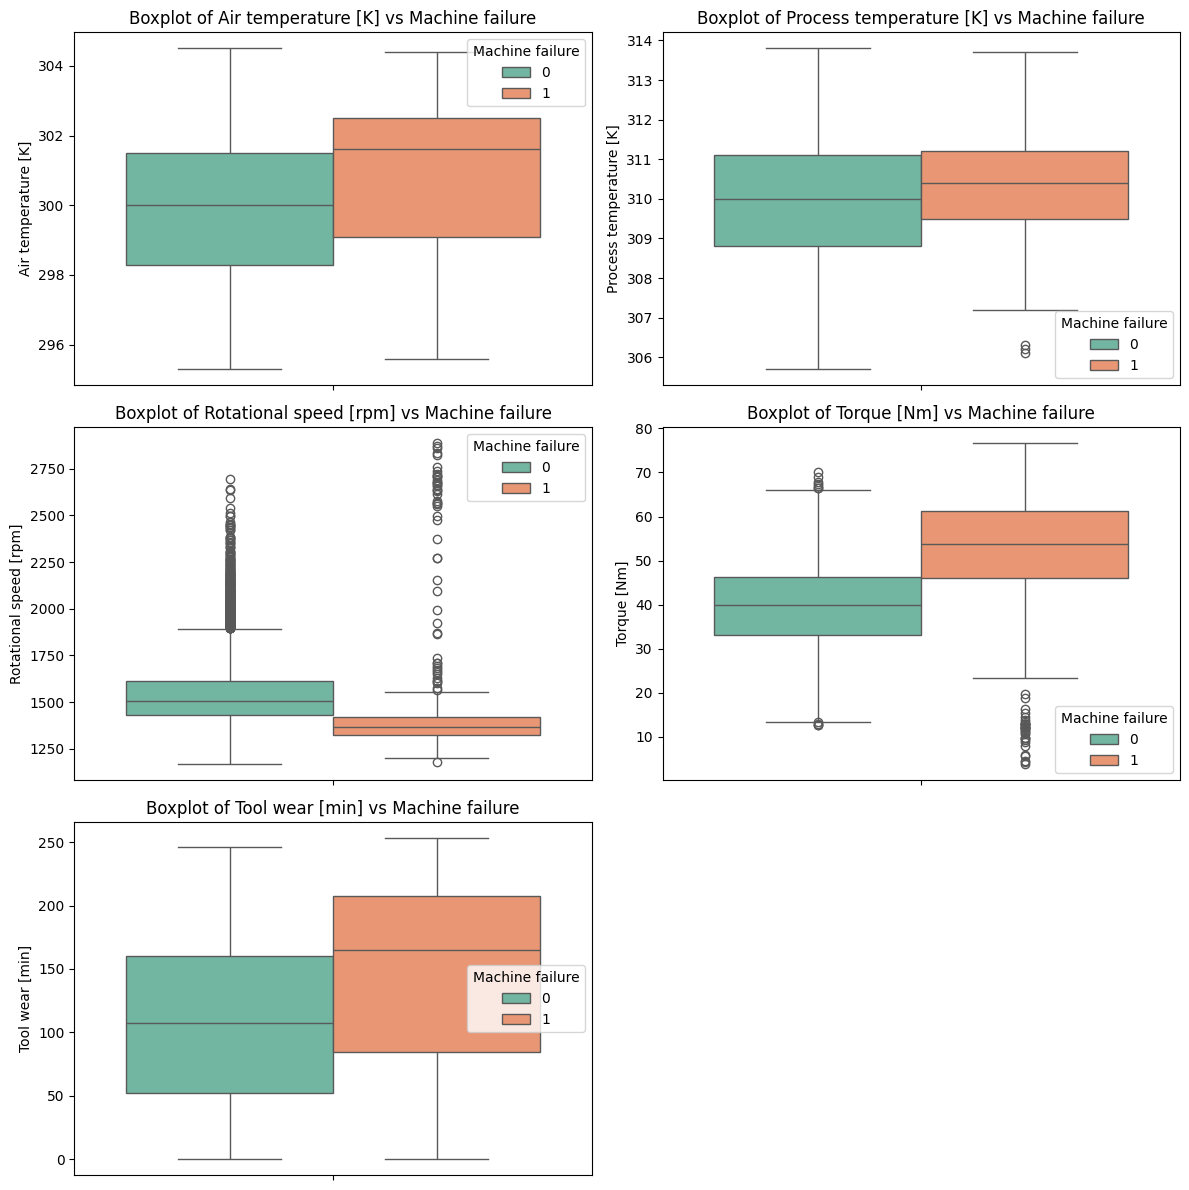

In [14]:
plt.figure(figsize=(12,12))
for i ,col in enumerate(data):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df,y=col,hue='Machine failure',palette='Set2')
    plt.title(f'Boxplot of {col} vs Machine failure')
plt.tight_layout()

# Remove Outlier

In [15]:
df.shape

(10000, 7)

### Using IQR Method

In [16]:
Q1 = df['Rotational speed [rpm]'].quantile(0.25)
Q3 = df['Rotational speed [rpm]'].quantile(0.75)
IQR = Q3 - Q1
df = df[df['Rotational speed [rpm]'] <= (Q3 + 1.5 * IQR)]
df = df[df['Rotational speed [rpm]'] >= (Q1 - 1.5 * IQR)]

In [17]:
df.shape

(9582, 7)

### Using Z Score 

In [18]:
from scipy import stats
z = stats.zscore(df['Torque [Nm]'])
df= df[(z > -3) & (z < 3)]
df.shape

(9555, 7)

### After Removal of Outlier Data Distribution

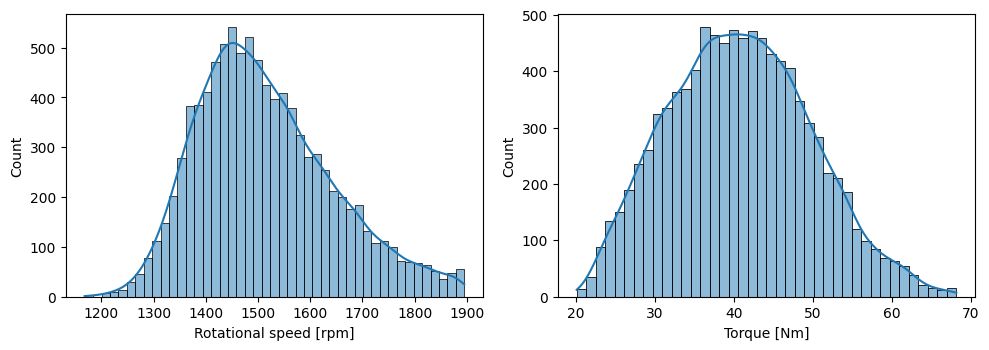

In [19]:
data=df[['Rotational speed [rpm]','Torque [Nm]']]
plt.figure(figsize=(10,10))
for i,col in enumerate(data):
    plt.subplot(3,2,i+1)
    ax=axis[i]
    sns.histplot(data=df,x=col,kde=True)
    ax.set_title(f'Distribution of Feature {col} is ')
plt.tight_layout()

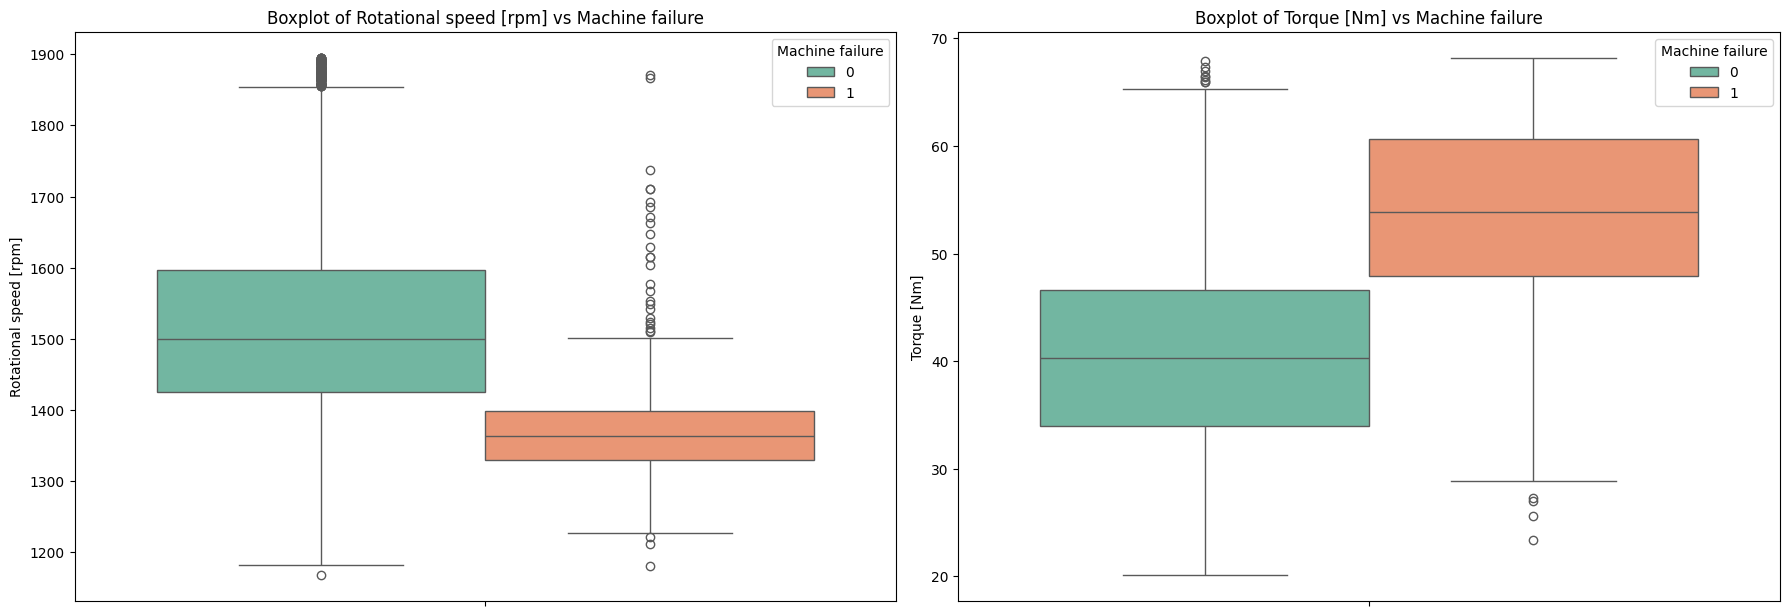

In [20]:
data=df[['Rotational speed [rpm]','Torque [Nm]']]
plt.figure(figsize=(18,18))
for i ,col in enumerate(data):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df,y=col,hue='Machine failure',palette='Set2')
    plt.title(f'Boxplot of {col} vs Machine failure')
plt.tight_layout()

In [21]:
low_machines=df[df['Type']=='L']
Medium_machines=df[df['Type']=='M']
high_machines=df[df['Type']=='H']

In [22]:
l=low_machines['Machine failure'].value_counts(normalize=True)
print(f'Distribution of target variable in low machines is \n{l}')
m=Medium_machines['Machine failure'].value_counts(normalize=True)
print(f'Distribution of target variable in medium machines is \n{m}')
h=Medium_machines['Machine failure'].value_counts(normalize=True)
print(f'Distribution of target variable in high machines is \n{h}')

Distribution of target variable in low machines is 
Machine failure
0    0.965258
1    0.034742
Name: proportion, dtype: float64
Distribution of target variable in medium machines is 
Machine failure
0    0.978344
1    0.021656
Name: proportion, dtype: float64
Distribution of target variable in high machines is 
Machine failure
0    0.978344
1    0.021656
Name: proportion, dtype: float64


In [23]:
l=low_machines.groupby('Machine failure')['Rotational speed [rpm]'].mean()
print(f'affect of rotational speed in low machines is {l}')
m=Medium_machines.groupby('Machine failure')['Rotational speed [rpm]'].mean()
print(f'affect of rotational speed in medium machines is {m}')
h=high_machines.groupby('Machine failure')['Rotational speed [rpm]'].mean()
print(f'affect of rotational speed in high machines is {h}')

affect of rotational speed in low machines is Machine failure
0    1520.095858
1    1373.552764
Name: Rotational speed [rpm], dtype: float64
affect of rotational speed in medium machines is Machine failure
0    1516.548376
1    1395.145161
Name: Rotational speed [rpm], dtype: float64
affect of rotational speed in high machines is Machine failure
0    1519.011628
1    1396.222222
Name: Rotational speed [rpm], dtype: float64


In [24]:
l=low_machines.groupby('Machine failure')['Torque [Nm]'].mean()
print(f'affect of torque in low machines is {l}')
m=Medium_machines.groupby('Machine failure')['Torque [Nm]'].mean()
print(f'affect of torque in medium machines is {m}')
h=high_machines.groupby('Machine failure')['Torque [Nm]'].mean()
print(f'affect of torque in high machines is {h}')

affect of torque in low machines is Machine failure
0    40.386833
1    53.747236
Name: Torque [Nm], dtype: float64
affect of torque in medium machines is Machine failure
0    40.599929
1    51.833871
Name: Torque [Nm], dtype: float64
affect of torque in high machines is Machine failure
0    40.400317
1    50.788889
Name: Torque [Nm], dtype: float64


In [25]:
l=low_machines.groupby('Machine failure')['Tool wear [min]'].mean()
print(f'affect of tool wear in low machines is {l}')
m=Medium_machines.groupby('Machine failure')['Tool wear [min]'].mean()
print(f'affect of tool wear in medium machines is {m}')
h=high_machines.groupby('Machine failure')['Tool wear [min]'].mean()
print(f'affect of tool wear in high machines is {h}')

affect of tool wear in low machines is Machine failure
0    106.688370
1    156.567839
Name: Tool wear [min], dtype: float64
affect of tool wear in medium machines is Machine failure
0    106.880043
1    135.467742
Name: Tool wear [min], dtype: float64
affect of tool wear in high machines is Machine failure
0    106.484144
1    145.611111
Name: Tool wear [min], dtype: float64


# Feature Engineering

In [26]:
df['Torque_Speed_Ratio'] = df['Torque [Nm]'] / df['Rotational speed [rpm]']
df['power(W)']= df['Torque [Nm]'] * df['Rotational speed [rpm]'] * (2 * np.pi / 60)
df['temp_diff']=df['Process temperature [K]'] - df['Air temperature [K]']

Text(0.5, 1.0, 'Correlation Matrix')

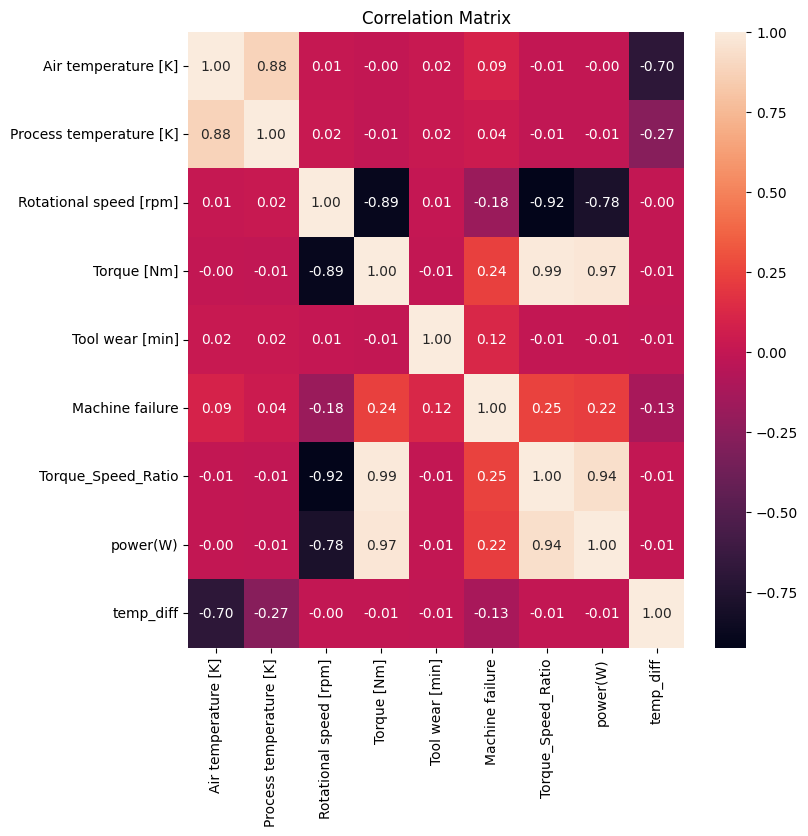

In [27]:
data=df.drop(['Type'],axis='columns')
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.title("Correlation Matrix")

# Model Training

In [28]:
x=df.drop(['Machine failure','Type','Torque_Speed_Ratio','Air temperature [K]','Process temperature [K]'],axis='columns')
y=df['Machine failure']

In [29]:
x.head()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],power(W),temp_diff
0,1551,42.8,0,6951.590560,10.5
1,1408,46.3,3,6826.722724,10.5
2,1498,49.4,5,7749.387543,10.4
3,1433,39.5,7,5927.504659,10.4
4,1408,40.0,9,5897.816608,10.5


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1)

### I tried Multiple Algorithm like Random forest,Decision Tree,Logistic Regression,KNN,SVC and Xgboost using Random Forest i check feature importance and then select these features and xgboost give me the best result overall

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [41]:
# Define the pipeline
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(sampling_strategy=0.5,k_neighbors=2,random_state=42)),
    ('xgb', XGBClassifier(scale_pos_weight=0.02))
])
# Define parameters
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1]
}
# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, 
                           cv=5, scoring='f1', 
                           verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'xgb__learning_rate': 0.2, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__subsample': 1}


# Model Evaluation

In [42]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1855
           1       0.98      0.71      0.82        56

    accuracy                           0.99      1911
   macro avg       0.98      0.86      0.91      1911
weighted avg       0.99      0.99      0.99      1911



<Axes: >

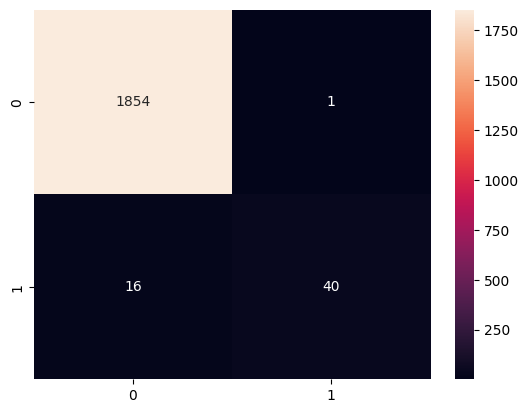

In [43]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d')
